In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Text(0, 0.5, 'Height')

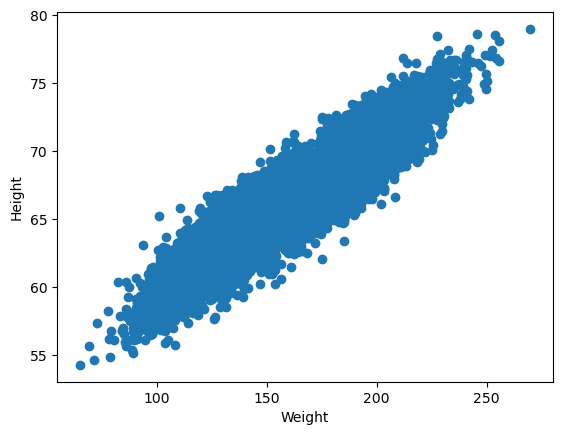

In [5]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
##Correlation
df['Weight'].corr(df['Height'])

np.float64(0.9247562987409146)

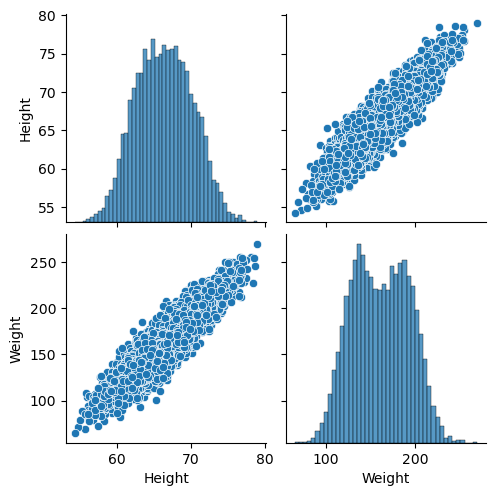

In [8]:
##seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
##Independent and dependent features
X=df[['Weight']] ##independent features should be data frame or 2D array
X.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [13]:
y=df['Height']##1dimensional or series 
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [15]:
np.array(y).shape

(10000,)

In [16]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
##Standardization   mean=0,standard deviation=1
from sklearn.preprocessing import StandardScaler


In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
X_test

array([[ 0.37115893],
       [ 1.05964173],
       [ 0.28064585],
       ...,
       [-1.16697743],
       [ 0.1278561 ],
       [ 0.05862451]], shape=(2500, 1))

In [21]:
##Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [23]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
regression.coef_

array([3.5520765])

In [25]:
regression.intercept_

np.float64(66.34834766149207)

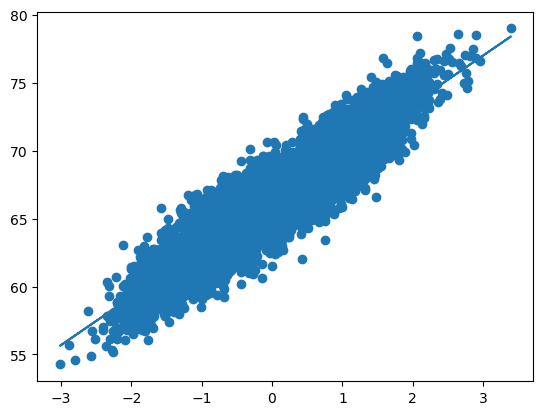

In [27]:
##plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))


In [31]:
##Prediction for test data
y_pred=regression.predict(X_test)
y_pred

array([67.66673256, 70.11227616, 67.3452232 , ..., 62.20315456,
       66.80250232, 66.55658642], shape=(2500,))

In [32]:
##Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.1245002931280457
1.16186862410503
1.4575665655907608


In [36]:
##R_square
from sklearn.metrics import r2_score

In [37]:
score=r2_score(y_test,y_pred)
score

0.857428881104187

In [38]:
##Adjusted R -Square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8573718069973433

In [39]:
##OLS Linear Regression
import statsmodels.api as sm


In [40]:
model=sm.OLS(y_train,X_train).fit()

In [41]:
prediction=model.predict(X_test)
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]
